# **Project Title: White Wine Quality Prediction**

## **Problem Statement:**
We are given a dataset consisting of White Wine quality and the components which decides the quality of the wine.
We are required to build a model which can predict the quality of wine with highest accuracy.

## **Importing Libraries and loading Dataset**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
white_wine_df = pd.read_csv("/content/winequality-white.csv",sep=";")

In [3]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine_df.shape

(4898, 12)

In [5]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# summarising datset
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#checking for any null values
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values present

## **Exploratory Data Analysis (EDA)**

**Distribution of white wine quality rating**

In [8]:
white_wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


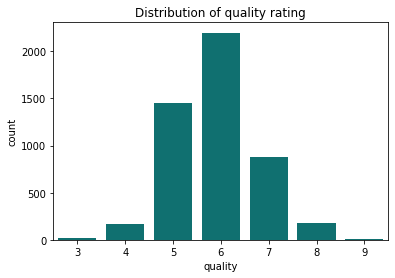

In [9]:
# distribution of quality rating
sns.countplot(white_wine_df['quality'],color='teal')
plt.title("Distribution of quality rating")
plt.show()

* The graph shows that most of the white wines data we have are having a moderate quality between 5 to 7.

* There are only few wines having a very high or a very low quality.

**Ploting the distribution of independent features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

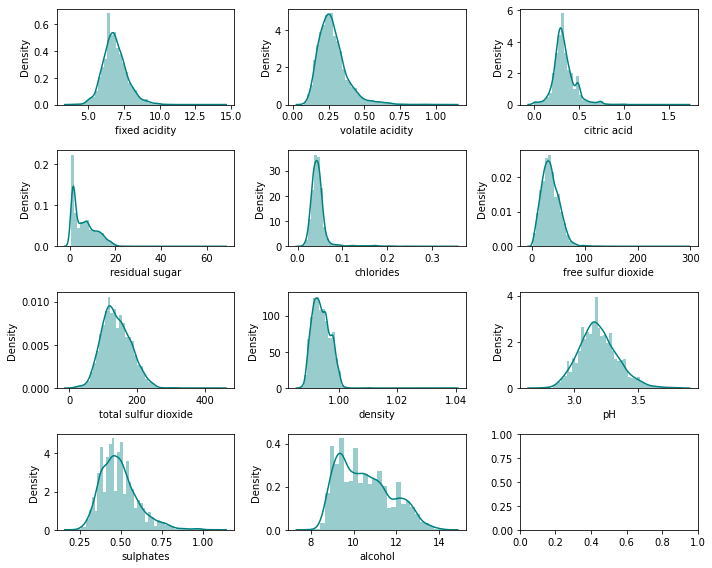

In [10]:
fig, axes = plt.subplots(4,3,figsize=(10,8))
i=0
for row in range(4):
    for col in range(3):
        if i<11:
            sns.distplot(white_wine_df[white_wine_df.columns[:-1][i]], ax=axes[row][col], color='teal')
            i+=1

fig.tight_layout()

Almost all the distribution plot is following an approximate normal distribution.

**Labeling the quality of wines as low,medium and high and observe how the concentration of each components contributing towards quality of white wines.**

In [11]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
#label encoding
white_wine_df_new = white_wine_df.replace({'quality':{3:'low',4:'low',5:'medium',6:'medium',7:'medium',8:'high',9:'high'}})

In [13]:
white_wine_df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


**Introducing Box-plot to observe concentartion of components of wine based on quality.**

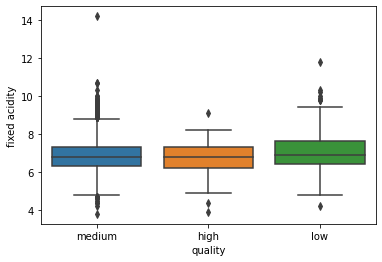

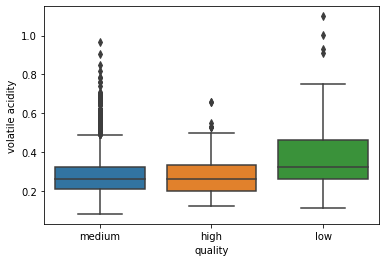

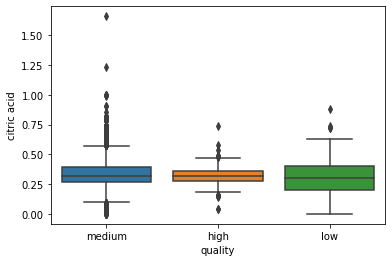

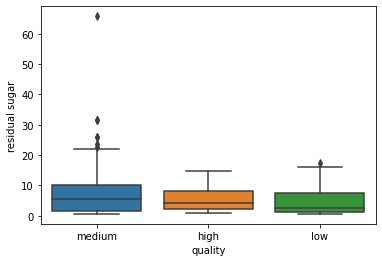

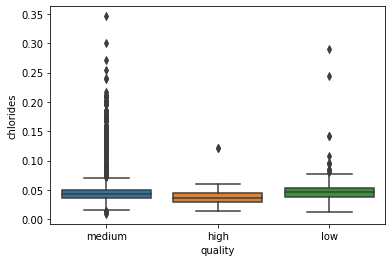

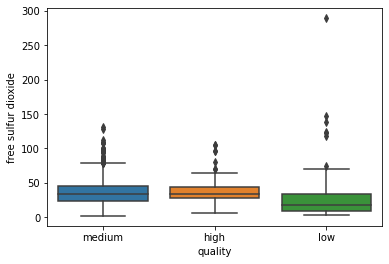

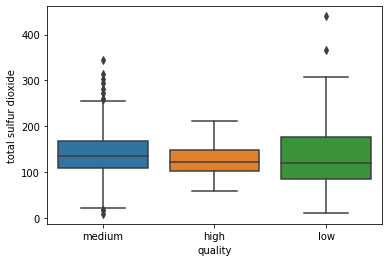

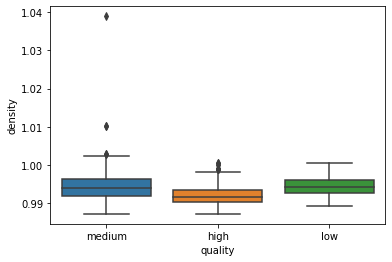

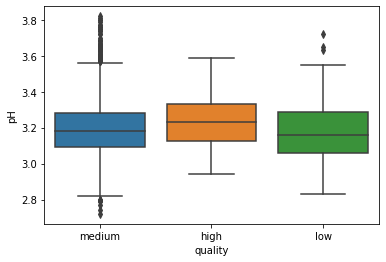

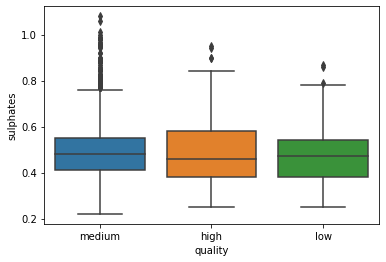

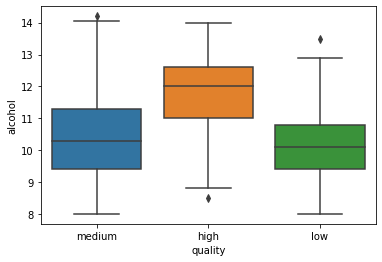

In [14]:
# plotting the relationship
for col in white_wine_df_new.describe().columns:
  sns.boxplot(x='quality', y=col, data=white_wine_df_new)
  plt.show()

**Observations:**

*   For the white wines having a high quality, the alcohol content and the pH value is higher while the chloride content is lower.
*   White wines having high fixed and volatile acidity are of low quality.



## **Correlation**

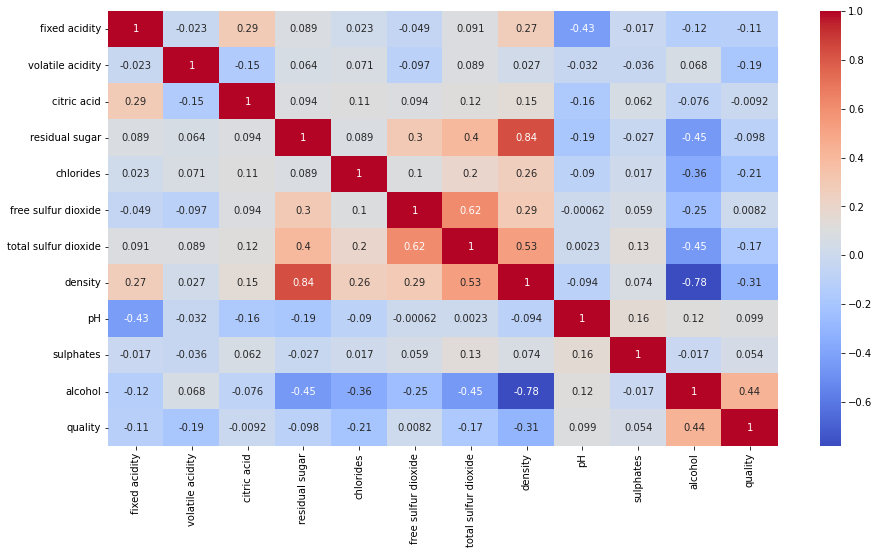

In [15]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = white_wine_df.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

**Observation:**


*   There are two strongly correalted data observed
1.   density v/s residual sugar
2.   density v/s alcohol
 
* There is a moderate correlation between free sulfur dioxide and total sulfur dioxide.


*   density is positively realted to residual suger, while we can also observe density is more valuable factor towards the quality of the wine as compared to residual sugar which is very low. This means that we can drop the residual sugar feature to remove collinearity.

* density is negatively realted to alcohol, while both are having good correaltion with quality. So it will be not a good choice to delete any of them, rather we can derive new feature taking both of them.

* To remove the collinearity between sulfur dioxide and total sulfur dioxide we will make new feature sulfur dioxide by summing them.



In [16]:
# Removing multicollinearity
white_wine_df.drop(columns='residual sugar',axis=1,inplace=True)
white_wine_df['density_per_unit_alcohol'] = white_wine_df['density']/white_wine_df['alcohol']
white_wine_df['sulfur dioxide'] = white_wine_df['free sulfur dioxide']+white_wine_df['total sulfur dioxide']

In [17]:
#dropping original columns
white_wine_df.drop(columns=['free sulfur dioxide','total sulfur dioxide','density','alcohol'],axis=1,inplace=True)

In [18]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,quality,density_per_unit_alcohol,sulfur dioxide
0,7.0,0.27,0.36,0.045,3.00,0.45,6,0.113750,215.0
1,6.3,0.30,0.34,0.049,3.30,0.49,6,0.104632,146.0
2,8.1,0.28,0.40,0.050,3.26,0.44,6,0.098525,127.0
3,7.2,0.23,0.32,0.058,3.19,0.40,6,0.100566,233.0
4,7.2,0.23,0.32,0.058,3.19,0.40,6,0.100566,233.0


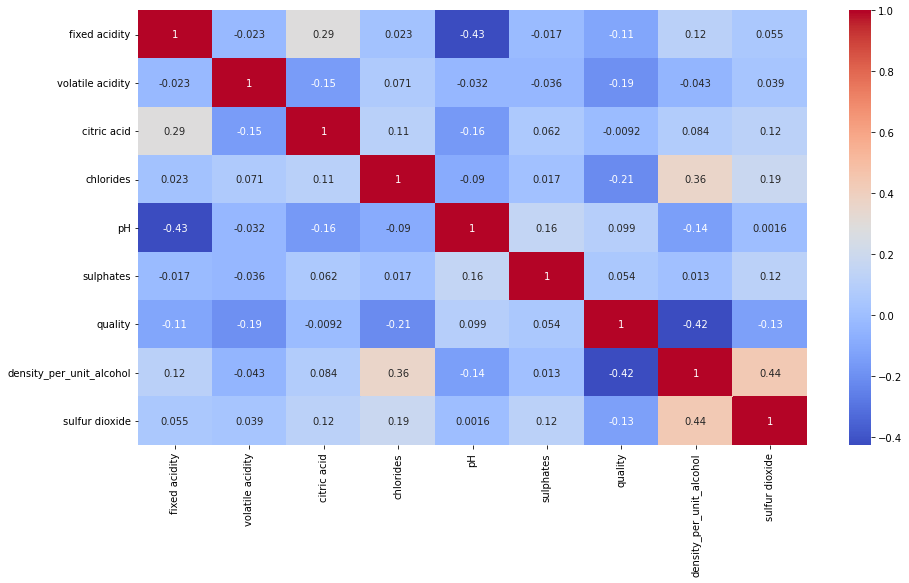

In [19]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = white_wine_df.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

**Now there is no significant correlation in our data.**

## **Data Preprocessing**

In [83]:
#Data split
X = white_wine_df[white_wine_df.columns.drop('quality')]
y = white_wine_df['quality']

In [84]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

**Introducing SMOTE for balancing the data**

Since Our data is heavily imbalanced, the model will not be able to learn on the data having a very less samples, which will eventually decrease the accuracy of model. So we will be using a technique called "Synthetic Minority Oversampling Technique"(SMOTE) to balance our data.

In [85]:
#Balancing using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X,y = oversample.fit_resample(X,y)

In [127]:
y.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

Data is balanced now

### **Train-Test split**

In [86]:
#Spliting into train-test and scaling the feature
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
mmscaler = MinMaxScaler()
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.transform(X_test)

## **Model Selection**

Since the target variable is a categorical with multiple classes. We need to apply a model which is suitable for multiclass classification.

The models which are applicable for this scenerio are:

1.   k-Nearest Neighbors.
2.   Decision Tree Classifier
3.   Naive Bayes.
4.   Random Forest Classifier
5.   Gradient Boosting 



**Note:- To detect overfitting, ie, failing to generalize a pattern by the model, we will be using k-fold Cross-validation technique for each model**

### **1. k-Nearest Neighbors**

In [141]:
#using GridsearchCV to apply k-fold cross validation and fitting the model.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(1, 20,2)}
knn = KNeighborsClassifier()
knn_clf=KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid,cv=5,return_train_score=True, verbose=1,scoring='accuracy')
knn_gscv.fit(X_train,y_train)
y_pred=knn_gscv.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [142]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(result2,2)}\n\n")

Confusion Matrix:
[[440   0   0   0   0   0   0]
 [  3 426   5   3   2   1   0]
 [  0  30 321  60  22   6   0]
 [  5  23  65 258  70  18   1]
 [  3   8  16  37 353  22   1]
 [  0   2   2   1  11 423   1]
 [  0   0   0   0   0   0 439]]
Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       440
           4       0.87      0.97      0.92       440
           5       0.78      0.73      0.76       439
           6       0.72      0.59      0.65       440
           7       0.77      0.80      0.79       440
           8       0.90      0.96      0.93       440
           9       0.99      1.00      1.00       439

    accuracy                           0.86      3078
   macro avg       0.86      0.86      0.86      3078
weighted avg       0.86      0.86      0.86      3078

Accuracy:0.86




### **2. Decision Tree Classifier**

In [115]:
#using GridsearchCV to apply k-fold cross validation and fitting the model.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,100]}
dt_clf=DecisionTreeClassifier()
dt_gscv = GridSearchCV(dt_clf, param_grid,cv=5,return_train_score=True, verbose=1,scoring='accuracy')
dt_gscv.fit(X_train,y_train)
y_pred=dt_gscv.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [116]:
dt_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 50}

In [117]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(result2,2)}\n\n")

Confusion Matrix:
[[428   4   5   3   0   0   0]
 [  5 368  34  27   4   2   0]
 [  6  39 291  76  17  10   0]
 [  6  19  78 263  55  18   1]
 [  5   7  29  46 324  28   1]
 [  0   9   2  23  24 381   1]
 [  0   0   0   0   4   0 435]]
Classification Report:
              precision    recall  f1-score   support

           3       0.95      0.97      0.96       440
           4       0.83      0.84      0.83       440
           5       0.66      0.66      0.66       439
           6       0.60      0.60      0.60       440
           7       0.76      0.74      0.75       440
           8       0.87      0.87      0.87       440
           9       0.99      0.99      0.99       439

    accuracy                           0.81      3078
   macro avg       0.81      0.81      0.81      3078
weighted avg       0.81      0.81      0.81      3078

Accuracy:0.81




### **3. Naive Bayes**

In [103]:
#using GridsearchCV to apply k-fold cross validation and fitting the model.
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_clf = GaussianNB()
gnb_gscv = GridSearchCV(gnb_clf, param_grid,cv=5,return_train_score=True, verbose=1,scoring='accuracy')
gnb_gscv.fit(X_train,y_train)
y_pred=gnb_gscv.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [104]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(result2,2)}\n\n")

Confusion Matrix:
[[210  15 101  15  57   6  36]
 [ 31 178 112  27  69  19   4]
 [ 28  50 228  41  72  19   1]
 [ 13  20  97  56 177  59  18]
 [  2   8  56  23 224  75  52]
 [  0   4  44  29 174 135  54]
 [  0   0   0   0   6   2 431]]
Classification Report:
              precision    recall  f1-score   support

           3       0.74      0.48      0.58       440
           4       0.65      0.40      0.50       440
           5       0.36      0.52      0.42       439
           6       0.29      0.13      0.18       440
           7       0.29      0.51      0.37       440
           8       0.43      0.31      0.36       440
           9       0.72      0.98      0.83       439

    accuracy                           0.47      3078
   macro avg       0.50      0.48      0.46      3078
weighted avg       0.50      0.47      0.46      3078

Accuracy:0.47




### **4. Random Forest Classifier**

In [122]:
#using GridsearchCV to apply k-fold cross validation and fitting the model.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[100,200,500,1000], 'max_depth':[50,60,70,80,90,100]}
rf_clf=RandomForestClassifier()
rf_gscv = GridSearchCV(rf_clf, param_grid,cv=5,return_train_score=True, verbose=1,scoring='accuracy')
rf_gscv.fit(X_train,y_train)
y_pred=rf_gscv.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [123]:
rf_gscv.best_params_

{'max_depth': 60, 'n_estimators': 500}

In [124]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(result2,2)}\n\n")

Confusion Matrix:
[[440   0   0   0   0   0   0]
 [  1 426   6   3   3   1   0]
 [  2  31 340  54  12   0   0]
 [  3   9  80 275  62  11   0]
 [  1   2  15  41 368  12   1]
 [  0   0   1   0   8 431   0]
 [  0   0   0   0   0   0 439]]
Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       440
           4       0.91      0.97      0.94       440
           5       0.77      0.77      0.77       439
           6       0.74      0.62      0.68       440
           7       0.81      0.84      0.82       440
           8       0.95      0.98      0.96       440
           9       1.00      1.00      1.00       439

    accuracy                           0.88      3078
   macro avg       0.88      0.88      0.88      3078
weighted avg       0.88      0.88      0.88      3078

Accuracy:0.88




### **5. Gradient Boosting**

In [138]:
#using GridsearchCV to apply k-fold cross validation and fitting the model.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    "learning_rate": [0.01,0.05,0.1],
    "n_estimators":[50,100,500]
    }
gb_clf=GradientBoostingClassifier()
gb_gscv = GridSearchCV(gb_clf, param_grid,cv=5,return_train_score=True, verbose=2,scoring='accuracy')
gb_gscv.fit(X_train,y_train)
y_pred=gb_gscv.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  11.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  12.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  11.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  11.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  11.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  21.8s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  21.8s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  21.7s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  21.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=  21.8s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time= 1.8min
[CV] END ...............learning_rate=0.01, n_est

In [140]:
gb_gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [139]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(result2,2)}\n\n")

Confusion Matrix:
[[439   0   1   0   0   0   0]
 [  3 396  23  12   5   1   0]
 [  5  38 293  91  12   0   0]
 [  5   8  86 269  59  12   1]
 [  5  10  25  52 321  27   0]
 [  1   4   2   7  27 399   0]
 [  0   0   0   0   1   0 438]]
Classification Report:
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       440
           4       0.87      0.90      0.88       440
           5       0.68      0.67      0.67       439
           6       0.62      0.61      0.62       440
           7       0.76      0.73      0.74       440
           8       0.91      0.91      0.91       440
           9       1.00      1.00      1.00       439

    accuracy                           0.83      3078
   macro avg       0.83      0.83      0.83      3078
weighted avg       0.83      0.83      0.83      3078

Accuracy:0.83




## **Conclusion:**

The accuracy of model is highest for **Random Forest** along with having highest precision and recall for the quality labels-5,6 and 7.
Since the precision and recall value is high for the the quality labels- 3,4,8,9 for all models, as it contains many duplicated rows created through SMOTE technique to balance data and it becomes easier for models to memorise the duplicated features which results in high accuracy.

So the **precision, recall and f1-scor**e of the quality labels- 5,6 and 7 matters a lot, which is highest for the model **Random Forest.**

**Hence we conclude that Random Forest model is best fit for our data having accuracy of 0.88 .**